Nama: Aulia Insani. H

NIM: H071201003

Mata kuliah: Machine Learning

# Customer Segmentation K-Means Analysis
Segmentasi pasar (customer segmentation) secara umum adalah kegiatan membagi suatu pasar menjadi kelompok-kelompok pembeli yang berbeda yang memiliki kebutuhan, karakteristik, atau perilaku yang berbeda yang mungkin membutuhkan produk atau bauran pemasaran yang berbeda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Visualization

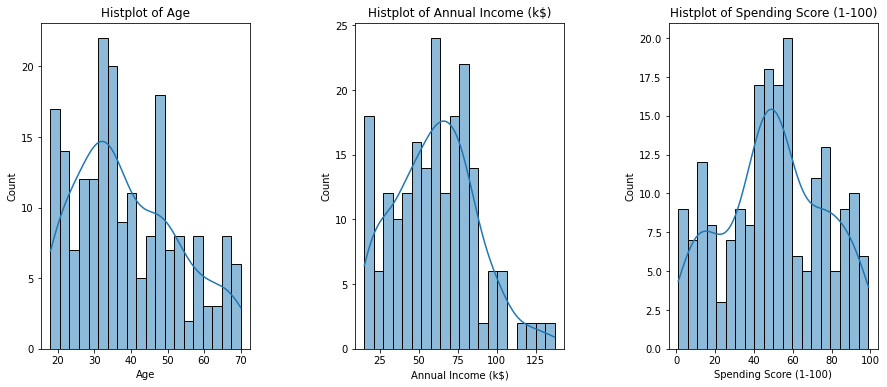

In [5]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data=df, x=col, bins = 20, kde=True)
    plt.title('Histplot of {}'.format(col))
plt.show()

[]

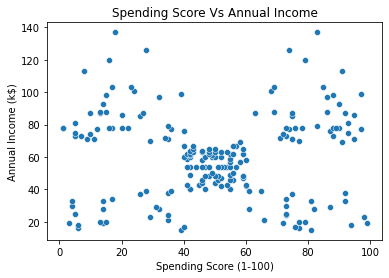

In [6]:
plt.title("Spending Score Vs Annual Income")
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)")
plt.plot()

**Observations**
* Dari visualisasi di atas dapat disimpulkan bahwa Data dapat dikategorikan menjadi 5 cluster berdasarkan pendapatan (income) dan skor pengeluaran (spending score).

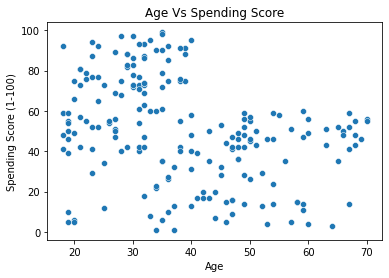

In [7]:
plt.title("Age Vs Spending Score")
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.show()

**Observations**
* Dari plot di atas kita dapat menyimpulkan bahwa orang-orang antara 20 - 40 tahun adalah orang-orang yang lebih mungkin berbelanja karena berada di tahun-tahun prima dan memiliki pendapatan yang tinggi untuk dibelanjakan.
* Sedangkan setelah usia 40 tahun, orang cenderung berpenghasilan lebih sedikit atau menggunakan uang pensiun atau tabungan mereka yang mungkin menjadi alasan untuk membelanjakan uang lebih sedikit.

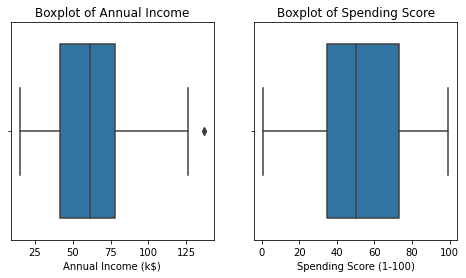

In [8]:
# Checking for any outliers as we will be using the K-Means Algorithm
# Box Plot for finding outliers
plt.figure(figsize=(8,4))
plt.subplots_adjust(hspace=.25)

plt.subplot(1,2,1)
plt.title("Boxplot of Annual Income")
sns.boxplot(x = df['Annual Income (k$)'])

plt.subplot(1,2,2)
plt.title("Boxplot of Spending Score")
sns.boxplot(x= df['Spending Score (1-100)'])

plt.show()

**Observations**
* Dari plot di atas kita dapat melihat bahwa ada outlier dalam Pendapatan Tahunan (Annual Income) yang dapat mempengaruhi model K mean kita, jadi kita perlu menangani outlier dengan benar.

# Data Pre-Processing

In [9]:
# Drop ID as it does not have any effect in analysis as well as the model
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
# Remove the Outlier using upper and lower boundary technique
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur = remove_outlier(df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)'] > ur, ur , df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)'] < lr, lr ,df['Annual Income (k$)'])

<AxesSubplot:title={'center':'Boxplot of Annual Income'}, xlabel='Annual Income (k$)'>

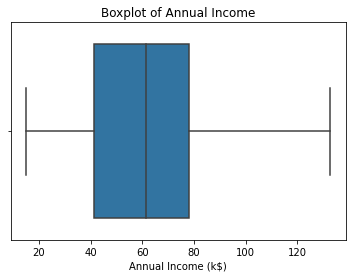

In [12]:
plt.title("Boxplot of Annual Income")
sns.boxplot(x = df['Annual Income (k$)'])

**Sekarang outlier dihapus dan kolom siap digunakan dalam model**

In [13]:
# Perform One Hot Encoding for the Gender Column
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15.0,39,0,1
1,21,15.0,81,0,1
2,20,16.0,6,1,0
3,23,16.0,77,1,0
4,31,17.0,40,1,0


**Karena salah satu Kolom Gender cukup untuk mengkategorikan Gender, kami menghapus salah satu kolom laki-laki atau perempuan untuk menghindari duplikasi**

In [14]:
# Drop Female or either male to avoid duplication
df.drop('Gender_Female', axis = 1, inplace = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15.0,39,1
1,21,15.0,81,1
2,20,16.0,6,0
3,23,16.0,77,0
4,31,17.0,40,0


# Training the Model

In [15]:
# Importing all the necessary modules for predicting, finding right params and validation
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score

**Menghitung K (Clusters value) terbaik untuk K-Means**

In [16]:
# Calculating the best possible cluster
wss = []
for cluster in range(1, 11):
    KM = KMeans(n_clusters = cluster)
    KM.fit(df)
    wss.append(KM.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
for index, rate in enumerate(wss):
    if index == 0:
        print("Cluster " + str(index) + " Diff in wss value: Not Applicable")
    else:
        print("Cluster " + str(index) + " Diff in wss value: " + str(wss[index - 1] - wss[index]))

Cluster 0 Diff in wss value: Not Applicable
Cluster 1 Diff in wss value: 95969.04151214834
Cluster 2 Diff in wss value: 69056.44642439095
Cluster 3 Diff in wss value: 38976.917018155145
Cluster 4 Diff in wss value: 29008.71133535057
Cluster 5 Diff in wss value: 17046.920528874383
Cluster 6 Diff in wss value: 6980.048298169408
Cluster 7 Diff in wss value: 6265.071269598848
Cluster 8 Diff in wss value: 4090.2790567933043
Cluster 9 Diff in wss value: 3367.960612916366


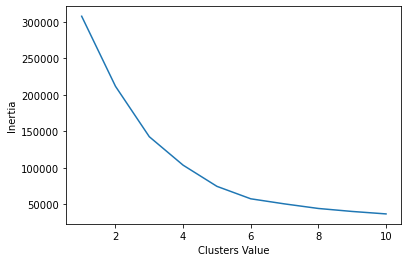

In [18]:
# Plot of wss
plt.xlabel('Clusters Value') , plt.ylabel('Inertia')
plt.plot(range(1,11), wss)

**Dari plot dan perhitungan di atas kita dapat mengamati bahwa K=5 akan menjadi nilai yang benar.**

In [26]:
# Training the K-Means
k_means = KMeans(n_clusters = 5)
k_means.fit(df)
k_means_labels = k_means.labels_

# return a label for each data point based on their cluster
Y = k_means.fit_predict(df)

print(Y)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


5 Clusters - 0, 1, 2, 3, 4

# Analysis

**Plotting label terhadap annual income dan Skor Pengeluaran (Spending Score) untuk memverifikasi clusters**

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

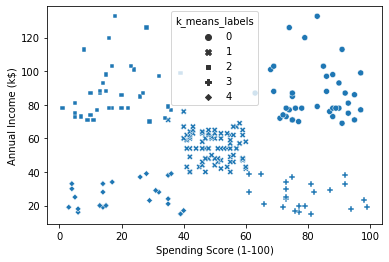

In [27]:
df['k_means_labels'] = k_means_labels

sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)", style="k_means_labels")

#### Analysed points:-
Dari cluster di atas, kita dapat memisahkan Data menjadi Lima Kategori: (Nomor kategori berdasarkan Grafik K-Means)-

        1. Category 0 -  High Income High Spending Category
        2. Category 1 -  Medium Income Medium Spending
        3. Category 2 -  High Income Low Spending Category
        4. Category 3 -  Low Income High Spending Category
        5. Category 4 -  Low Income Low Spending Category